<a href="https://colab.research.google.com/github/marcogemaque/EDA-exercises/blob/master/classification_project_br_edited.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![](https://i.imgur.com/JsMvGnP.png)

## Projeto - Classificação

## 1. Considerações iniciais

Neste notebook vamos praticar a construção de um modelo de Machine Learning. Mais especificamente, iremos utilizar um algoritmo para realizar um processo de classificação. Propositalmente, evitaremos adentrar em algoritmos e explicações mais complexas, pois o foco é percorrer o fluxo do Aprendizado de Máquina por inteiro, ou o máximo dele.

### 1.1. O Problema de Negócio

A _churn rate_ (taxa de rotatividade ou cancelamento) é a porcentagem de assinantes de um serviço que interrompe suas assinaturas dentro de um determinado período de tempo. Para uma empresa expandir sua clientela, sua taxa de crescimento, medida pelo número de novos clientes, deve exceder sua taxa de cancelamento (_churn rate_).

Portanto, neste projeto, um banco deseja que você construa um modelo de Machine Learning que possa prever a probabilidade de seus clientes atuais fecharem suas contas em um futuro próximo e, portanto, calcular sua _churn rate_.

Esse é um problema de classificação no qual você classifica se um cliente irá sair (y=1) ou permanecer (y=0) com base diversos atributos.

### 1.2. Descrição do dados

No arquivo *Churn_Modelling.csv* você encontrará:
- **RowNumber**: id do registro/linha.
- **CustomerId**: identificador único do cliente.
- **Surname**: sobrenome do cliente.
- **CreditScore**: pontuação de crédito do cliente.
- **Geography**: país de origem do cliente.
- **Gender**: sexo do cliente.
- **Age**: idade do cliente.
- **Tenure**: número de anos em que o cliente está com o banco.
- **Balance**: saldo bancário.
- **NumOfProducts**: número de produtos que o cliente utiliza.
- **HasCrCard**: indica se o cliente tem (1) ou não tem (0) cartão de crédito.
- **IsActiveMember**: indica se o cliente é (1) ou não é (0) ativo no banco.
- **EstimatedSalary**: salário estimado em dólares.
- **Exited**: indica se o cliente encerrou (1) a conta no banco ou se o cliente foi retido (0).


### 1.3 Métricas de Avaliação

Avalie seu modelo utilizando as métricas Acurácia e AUC (area under the ROC) estudadas nos módulos anteriores.

Trabalhe até conseguir uma acurácia acima e 85%.

## 2. Etapas do Projeto

Neste projeto você poderá seguir o fluxo que preferir, mas como sugestão pode seguir as seguintes etapas:
1. Análise exploratória 
2. Preparação e limpeza dos dados
3. Seleção de atributos
4. Construção do modelo
5. Avaliação do modelo
6. Otimização do modelo

Lembrando que esses passos, provavelmente, serão executados várias vezes até se obter um resultado satisfatório.

Sugestões de modelos:
* Logistic Regression Classification
* K-Nearest Neighbour (KNN) Classification
* Support Vector Machine (SVM) Classification
* Naive Bayes Classification
* Decision Tree Classification
* Random Forest Classification

Em caso de dúvidas, não esqueça de conversar com seu mentor.

## 3. Desenvolvimento do Projeto
*Adicione células você precisar para cada etapa*

In [1]:
import pandas as pd
import sklearn
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### 3.1 Análise exploratória

In [2]:
df_real = pd.read_csv('https://raw.githubusercontent.com/awarischool/br-classification-project/master/Churn_Modelling.csv')
df = df_real.copy()

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

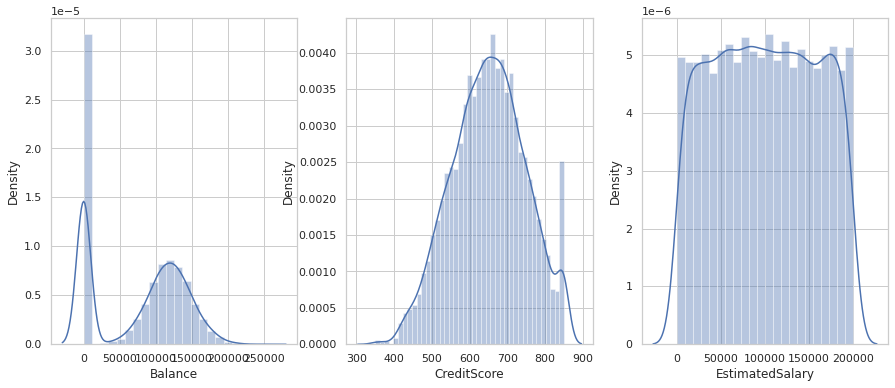

In [6]:
sns.set(style="whitegrid")
f, axes = plt.subplots(1,3, figsize=(15,6))
sns.distplot(df['Balance'], ax=axes[0])
sns.distplot(df['CreditScore'], ax=axes[1])
sns.distplot(df['EstimatedSalary'], ax=axes[2])

<Figure size 1080x432 with 0 Axes>

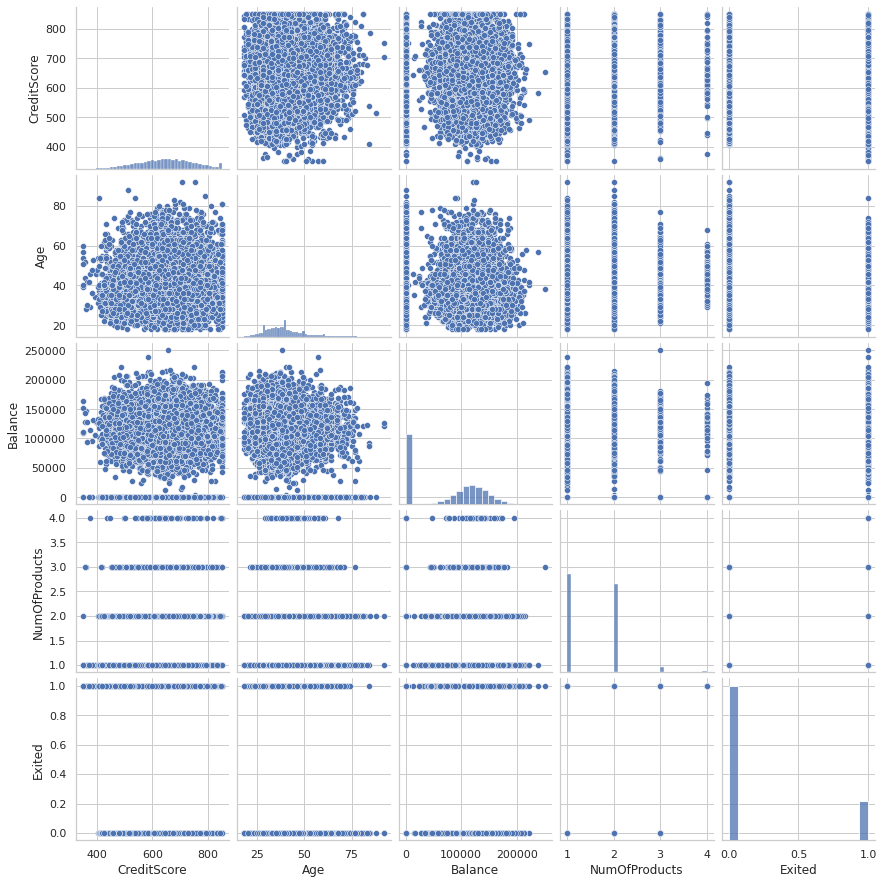

In [7]:
plt.figure(figsize=(15,6))
ax = sns.pairplot(df,
                  x_vars = ['CreditScore','Age','Balance','NumOfProducts','Exited'],
                  y_vars=['CreditScore','Age','Balance','NumOfProducts','Exited'],
                  )

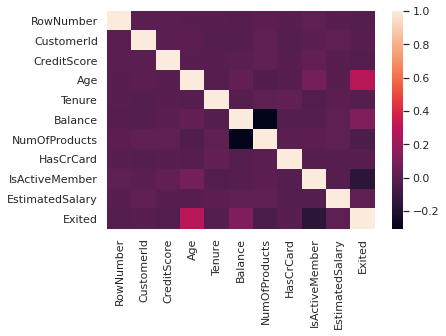

In [8]:
sns.heatmap(df.corr())

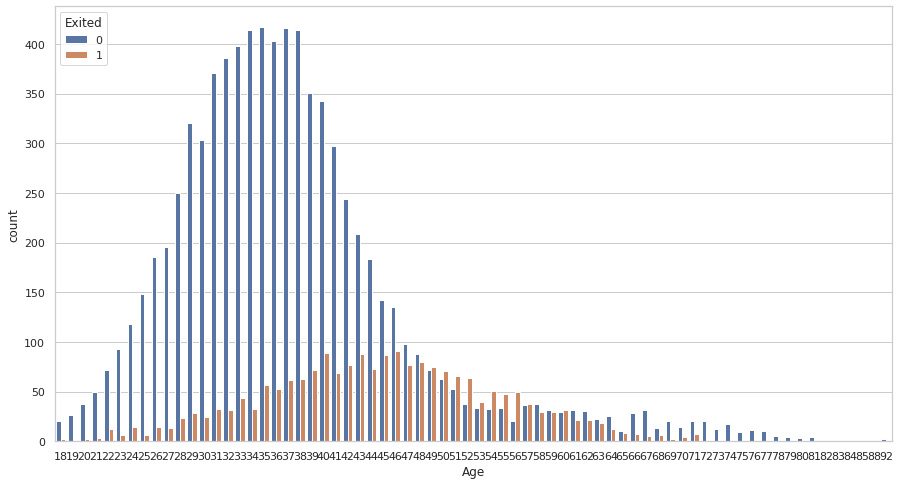

In [9]:
plt.figure(figsize=(15,8))
ax = sns.countplot(x=df['Age'], hue=df['Exited'])

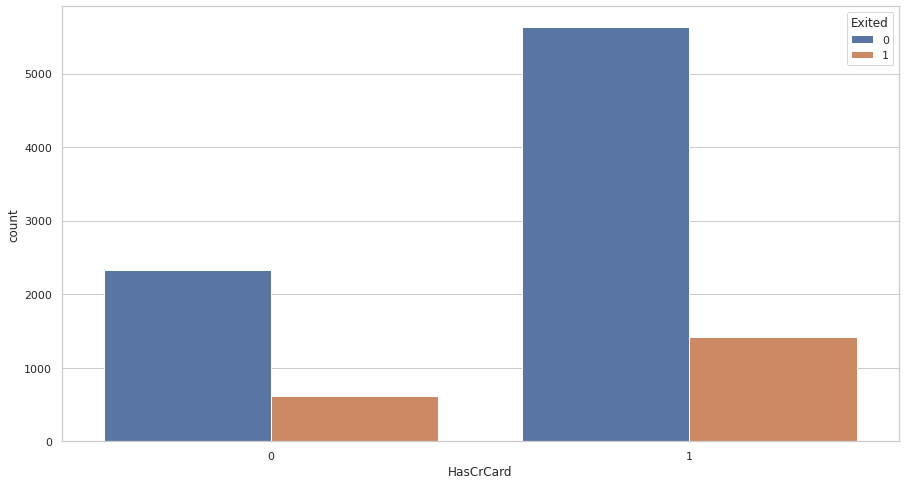

In [10]:
plt.figure(figsize=(15,8))
ax = sns.countplot(x=df['HasCrCard'], hue=df['Exited'])

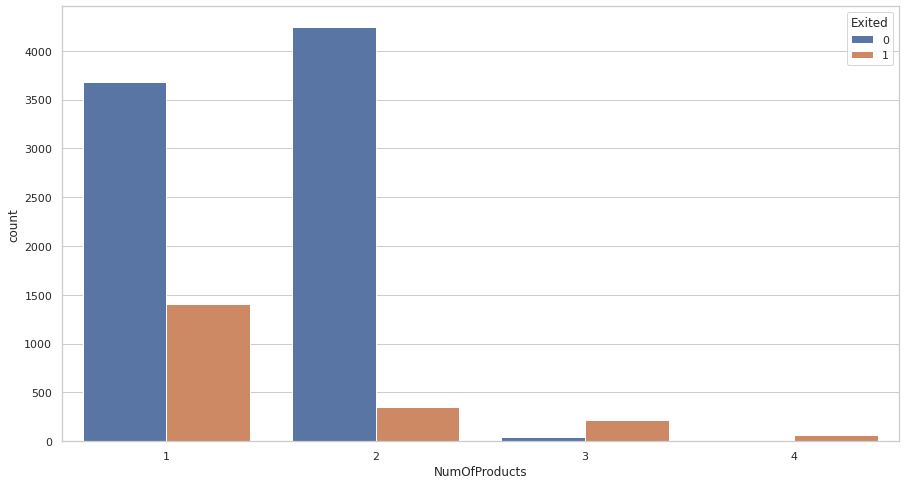

In [11]:
plt.figure(figsize=(15,8))
ax = sns.countplot(x=df['NumOfProducts'], hue=df['Exited'])

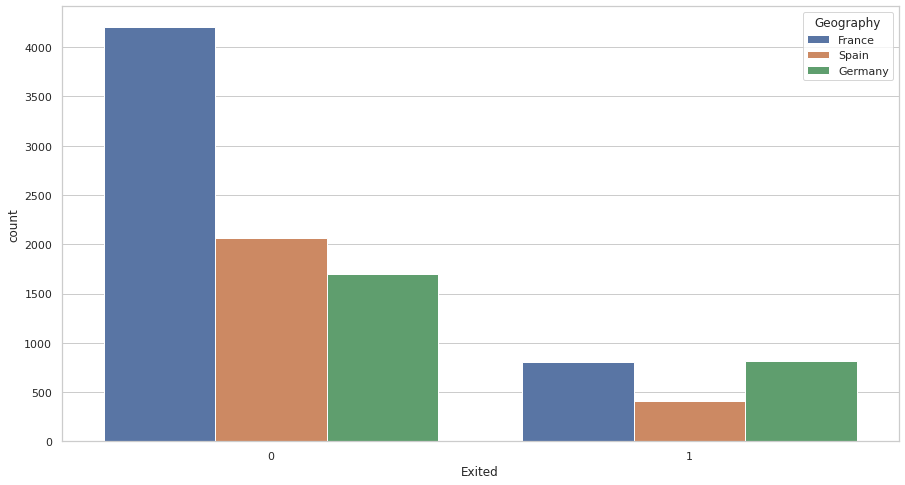

In [12]:
plt.figure(figsize=(15,8))
ax = sns.countplot(x=df['Exited'], hue=df['Geography'])

### 3.2 Preparação e limpeza dos dados

In [13]:
df = df_real.copy()

In [14]:
df['Balance'] = df['Balance'].apply(lambda x: np.log(x) if x > 0 else x)
df['EstimatedSalary'] = df['EstimatedSalary'].apply(lambda x: np.log(x) if x > 0 else x)
df['CreditScore'] = df['CreditScore'].apply(lambda x: 0 if x < 580 else (1 if x < 670 else 2))
df['NumOfProducts'] = df['NumOfProducts'].apply(lambda x: 0 if x <= 2 else 1)
df['Age'] = df['Age'].apply(lambda x: 0 if x <= 30 else (1 if x<= 40 else (2 if x<=50 else 3)))
df = df.drop(['RowNumber','CustomerId','Surname'], axis=1)

In [15]:
df = pd.get_dummies(df, columns=['NumOfProducts'])
df = pd.get_dummies(df, columns=['Geography'])
df = pd.get_dummies(df, columns=['Gender'])
df = pd.get_dummies(df, columns=['CreditScore'])

In [16]:
df.head()

,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited,NumOfProducts_0,NumOfProducts_1,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,CreditScore_0,CreditScore_1,CreditScore_2
0,2,2,0.000000,1,1,11.526324,1,1,0,1,0,0,1,0,0,1,0
1,2,1,11.336282,0,1,11.631087,0,1,0,0,0,1,1,0,0,1,0
2,2,8,11.980807,1,0,11.643353,1,0,1,1,0,0,1,0,1,0,0
3,1,1,0.000000,0,0,11.449204,0,1,0,1,0,0,1,0,0,0,1
4,2,2,11.740147,1,1,11.278267,0,1,0,0,0,1,1,0,0,0,1


### 3.3 Seleção de atributos

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [18]:
y = df['Exited']
x = df.drop(['Exited'], axis=1)
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=1362, test_size=0.33)

### 3.4 Construção do modelo

### **Logistic Regression**

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [20]:
lr = LogisticRegression(random_state=1362).fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [22]:
nb = GaussianNB().fit(x_train, y_train)

In [25]:
tree = DecisionTreeClassifier(random_state=1362).fit(x_train, y_train)

In [28]:
svc = SVC(random_state=1362).fit(x_train, y_train)

### 3.5 Avaliação do modelo

In [29]:
from sklearn.model_selection import cross_val_score

In [31]:
scores = cross_val_score(nb, x_train, y_train, cv=10)
scores

array([0.82835821, 0.81641791, 0.8119403 , 0.81940299, 0.81641791,
       0.83134328, 0.81940299, 0.81492537, 0.8238806 , 0.82238806])

In [32]:
scores = cross_val_score(tree, x_train, y_train, cv=10)
scores

array([0.75074627, 0.77761194, 0.77761194, 0.76716418, 0.77014925,
       0.74925373, 0.78955224, 0.78358209, 0.77910448, 0.76567164])

In [33]:
scores = cross_val_score(svc, x_train, y_train, cv=10)
scores

array([0.82835821, 0.81641791, 0.8119403 , 0.81940299, 0.81641791,
       0.83134328, 0.81940299, 0.81492537, 0.8238806 , 0.82089552])

In [34]:
#usando tree classifier
from sklearn.metrics import accuracy_score

In [35]:
y_pred = tree.predict(x_test)
score = accuracy_score(y_test, y_pred)
score

0.7636363636363637

### 3.4 Otimização do modelo

In [38]:
for i in range(5,15):
    tree = DecisionTreeClassifier(random_state=1362, max_depth=i).fit(x_train, y_train)
    y_pred = tree.predict(x_test)
    print("Score for max depth {} was {}".format(i,accuracy_score(y_test, y_pred)))

Score for max depth 5 was 0.8463636363636363
Score for max depth 6 was 0.8506060606060606
Score for max depth 7 was 0.8496969696969697
Score for max depth 8 was 0.8451515151515151
Score for max depth 9 was 0.8427272727272728
Score for max depth 10 was 0.8375757575757575
Score for max depth 11 was 0.8296969696969697
Score for max depth 12 was 0.8175757575757576
Score for max depth 13 was 0.8084848484848485
Score for max depth 14 was 0.8057575757575758


In [39]:
depth = 6
methods = ['gini', 'entropy']
for method in methods:
    tree = DecisionTreeClassifier(random_state=1362, max_depth=depth, criterion=method).fit(x_train, y_train)
    y_pred = tree.predict(x_test)
    print("Score criterion {} was {}".format(method,accuracy_score(y_test, y_pred)))

Score criterion gini was 0.8506060606060606
Score criterion entropy was 0.8521212121212122


In [44]:
features = [10,15,'auto','sqrt','log2']
for feature in features:
    tree = DecisionTreeClassifier(random_state=1362, max_depth=depth, criterion='entropy',
                                  max_features=feature).fit(x_train, y_train)
    y_pred = tree.predict(x_test)
    print("Score for feature {} was {}".format(feature,accuracy_score(y_test, y_pred)))

Score for feature 10 was 0.8451515151515151
Score for feature 15 was 0.8527272727272728
Score for feature auto was 0.8193939393939393
Score for feature sqrt was 0.8193939393939393
Score for feature log2 was 0.8193939393939393


Dessa maneira o método foi aprimorado utilizando os parâmetros:
Gini, Depth=6 e Max_Depth = 15.

## 4. Conclusão
O fluxo de trabalho de Aprendizado de Máquina não termina após avaliação de performance do modelo escolhido. Na verdade, esta seria somente a primeira iteração de um processo que pode ter dezenas de tentativas.

Encorajamos você a repetir novamente o processo descrito neste notebook. Contudo, explorando novas possibilidades para verificar a melhora/piora da performance do seu modelo. Você pode remover variáveis/atributos menos importantes, normalizar variáveis importantes, escolher outros algoritmos de aprendizagem supervisionada, etc. O Aprendizado de Máquina é uma área interessante justamente por causa disto. Você testa, você erra, você recomeça.